# High-level R tutorial

##### Full Version: https://cryptocurrencyresearch.org/

## Install Packages

In [1]:
install.packages("pacman")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
library(pacman)

Now we can use the `p_load()` function to install and load all other packages we will need: 

In [3]:
p_load("pins","dplyr","ggplot2","caret","xgboost","kernlab","tsibble","fabletools","fable","feasts","urca","plotly")

###### The step above is very fast in this environment because all the packages were installed ahead of time, so `p_load()` detects the packages are already installed and avoids installing them again.

## Get the data

We can get the data using the `pins` package:

In [4]:
board_register(name = "pins_board", url = "https://raw.githubusercontent.com/predictcrypto/pins/master/", board = "datatxt")

In [5]:
cryptodata <- pin_get(name = "ETH_Binance")

#### Preview data:

In [6]:
cryptodata

Date,Symbol,Open,High,Low,Close,VolumeUSDT,CloseLag1Hour,CloseLag12Hour,CloseLag24Hour,CloseLag3Day,CloseLag7Day,CloseLag14Day,CloseLag30Day,CloseLag90Day,CloseLag120Day,Volatility,Target24HourClose,DateTime
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2020-01-01,ETH,128.87,130.65,128.78,130.64,1446167.8,131.59,131.53,131.89,127.60,126.21,124.46,151.03,179.04,177.06,1.4520888,130.15,2020-01-01 01:00:00
2020-01-01,ETH,130.64,130.98,130.35,130.85,980578.7,130.64,131.69,131.55,128.07,125.79,124.75,150.93,179.51,177.59,0.4833142,129.72,2020-01-01 02:00:00
2020-01-01,ETH,130.85,130.89,129.94,130.20,611279.5,130.85,129.73,131.26,127.94,125.74,123.90,150.04,179.05,178.50,0.7311067,129.10,2020-01-01 03:00:00
2020-01-01,ETH,130.20,130.74,130.15,130.20,436380.9,130.20,130.07,131.40,127.95,126.25,123.73,150.38,178.99,178.79,0.4533231,129.55,2020-01-01 04:00:00
2020-01-01,ETH,130.20,130.47,130.11,130.30,546887.9,130.20,129.32,132.70,128.14,125.85,123.23,148.03,177.79,178.28,0.2766890,129.63,2020-01-01 05:00:00
2020-01-01,ETH,130.30,130.75,130.26,130.44,474846.7,130.30,129.42,132.27,128.60,125.22,121.88,148.26,177.36,177.73,0.3761707,129.42,2020-01-01 06:00:00
2020-01-01,ETH,130.44,130.71,130.14,130.24,536082.7,130.44,128.49,132.20,128.43,125.66,121.69,148.37,177.23,177.63,0.4379899,129.26,2020-01-01 07:00:00
2020-01-01,ETH,130.24,130.41,129.87,130.36,955260.7,130.24,128.39,131.78,128.65,125.88,121.66,148.01,177.85,177.73,0.4158004,130.21,2020-01-01 08:00:00
2020-01-01,ETH,130.36,130.62,130.13,130.17,580140.8,130.36,128.91,131.70,128.08,125.44,122.06,149.27,177.68,175.66,0.3765465,129.98,2020-01-01 09:00:00


## Clean Data 

In [7]:
cryptodata <- mutate(cryptodata, Volatility = ((High - Low)/Low)*100)

##### We can look at the new column `Volatility`

In [8]:
head(cryptodata$Volatility)

[1] 1.4520888 0.4833142 0.7311067 0.4533231 0.2766890 0.3761707

#### Remove Symbol column:

In [9]:
cryptodata <- select(cryptodata, -Symbol)

#### Train/Test Split 

In [10]:
cryptodata_train <- head(cryptodata, as.integer(nrow(cryptodata)*.8))

In [11]:
cryptodata_test <- tail(cryptodata, as.integer(nrow(cryptodata)*.2))

## Visualization

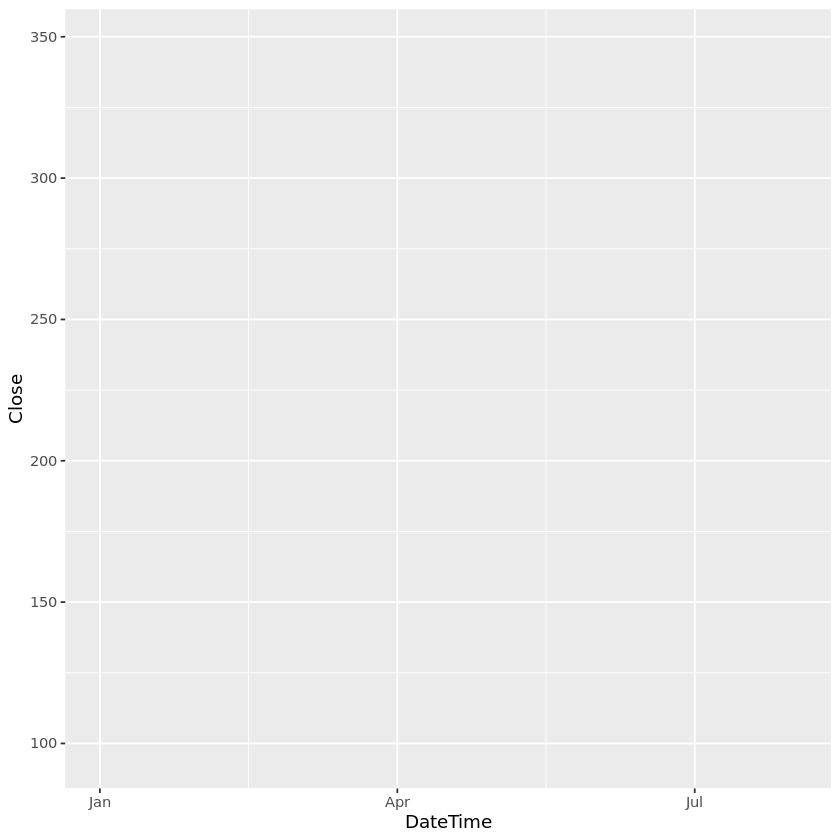

In [12]:
ggplot(data = cryptodata, aes(x = DateTime, y = Close))

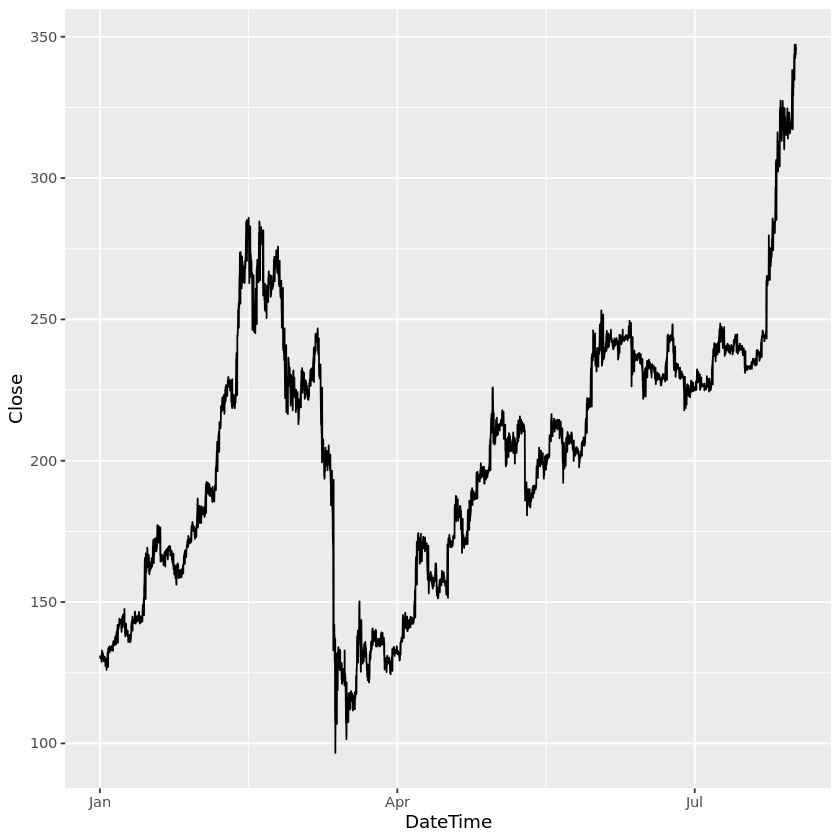

In [13]:
price_chart <- ggplot(data = cryptodata, aes(x = DateTime, y = Close)) +
  geom_line()
# Show chart
price_chart

## Predictive Models

##### Simple linear regression: 

In [14]:
lm(data = cryptodata_train, formula = "Target24HourClose ~ .")


Call:
lm(formula = "Target24HourClose ~ .", data = cryptodata_train)

Coefficients:
   (Intercept)            Date            Open            High             Low  
    -3.942e+02       1.961e-01      -5.768e-01       2.023e-01       6.675e-02  
         Close      VolumeUSDT   CloseLag1Hour  CloseLag12Hour  CloseLag24Hour  
     8.878e-01      -1.949e-07       5.406e-01      -2.150e-01       5.520e-02  
  CloseLag3Day    CloseLag7Day   CloseLag14Day   CloseLag30Day   CloseLag90Day  
     3.361e-02      -4.882e-02       1.923e-03      -3.517e-02       1.907e-02  
CloseLag120Day      Volatility        DateTime  
     1.298e-02       7.903e-01      -2.014e-06  


##### Making a linear regression model using the `caret` package:

In [15]:
lm_fit <- train(Target24HourClose ~ .,
                    data = cryptodata_train,
                    method = "lm")

In [16]:
lm_fit

Linear Regression 

4088 samples
  17 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 4088, 4088, 4088, 4088, 4088, 4088, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  9.590932  0.9486253  6.508789

Tuning parameter 'intercept' was held constant at a value of TRUE

##### XGBoost model:

In [17]:
xgb_fit <- train(Target24HourClose ~ . ,
                    data = cryptodata_train,
                    method = "xgbLinear")

##### Additional options in `caret::train()`:

In [18]:
svm_fit <- train(Target24HourClose ~ . ,
                    data = cryptodata_train,
                    method = "svmPoly",
                    preProc = c("center", "scale"))

In [19]:
svm_fit

Support Vector Machines with Polynomial Kernel 

4088 samples
  17 predictor

Pre-processing: centered (17), scaled (17) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 4088, 4088, 4088, 4088, 4088, 4088, ... 
Resampling results across tuning parameters:

  degree  scale  C     RMSE       Rsquared   MAE     
  1       0.001  0.25  10.292921  0.9417728  6.782129
  1       0.001  0.50  10.011139  0.9440781  6.563926
  1       0.001  1.00   9.861014  0.9455491  6.460119
  1       0.010  0.25   9.746032  0.9467964  6.398851
  1       0.010  0.50   9.684377  0.9474728  6.375912
  1       0.010  1.00   9.633933  0.9480159  6.358079
  1       0.100  0.25   9.587435  0.9485240  6.341356
  1       0.100  0.50   9.556656  0.9488595  6.329486
  1       0.100  1.00   9.540353  0.9490372  6.323933
  2       0.001  0.25   9.999784  0.9441910  6.556757
  2       0.001  0.50   9.845382  0.9457179  6.453068
  2       0.001  1.00   9.745234  0.9468067  6.397898
  2       0.010  0.25   9.44

#### Time-Aware Cross Validation

In [20]:
train_control <- trainControl(method = "timeslice",
                              initialWindow = 100*24,
                              horizon = 30*24,
                              fixedWindow = TRUE,
                              number = 5)

##### Linear Model with cross validation:

In [21]:
lm_fit <- train(Target24HourClose ~ . ,
                    data = cryptodata_train,
                    method = "lm",
                    trControl = train_control)

In [22]:
lm_fit

Linear Regression 

4088 samples
  17 predictor

No pre-processing
Resampling: Rolling Forecasting Origin Resampling (720 held-out with a fixed window) 
Summary of sample sizes: 2400, 2400, 2400, 2400, 2400, 2400, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  15.25791  0.4864379  12.28322

Tuning parameter 'intercept' was held constant at a value of TRUE

##### Using XGBoost with cross validation: (Commented out because takes a long time)

In [23]:
#xgb_fit <- train(Target24HourClose ~ . ,
#                    data = cryptodata_train,
#                    method = "xgbLinear",
#                    trControl = train_control)

In [24]:
#xgb_fit

### Make Predictions

In [25]:
lm_pred <- predict(lm_fit, newdata = cryptodata_test)

In [26]:
head(lm_pred)

1        2        3        4        5        6 
228.9325 228.4880 230.2093 230.2418 230.3623 229.1793

### Evaluate Performance

In [27]:
postResample(pred = lm_pred, obs = cryptodata_test$Close)

RMSE  Rsquared       MAE 
3.0974398 0.9971237 2.5801135

## Timeseries Data Prep

#### Make a tsibble

In [28]:
cryptodata_ts <- as_tsibble(cryptodata, index = DateTime)

In [29]:
cryptodata_ts

Date,Open,High,Low,Close,VolumeUSDT,CloseLag1Hour,CloseLag12Hour,CloseLag24Hour,CloseLag3Day,CloseLag7Day,CloseLag14Day,CloseLag30Day,CloseLag90Day,CloseLag120Day,Volatility,Target24HourClose,DateTime
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2020-01-01,128.87,130.65,128.78,130.64,1446167.8,131.59,131.53,131.89,127.60,126.21,124.46,151.03,179.04,177.06,1.4520888,130.15,2020-01-01 01:00:00
2020-01-01,130.64,130.98,130.35,130.85,980578.7,130.64,131.69,131.55,128.07,125.79,124.75,150.93,179.51,177.59,0.4833142,129.72,2020-01-01 02:00:00
2020-01-01,130.85,130.89,129.94,130.20,611279.5,130.85,129.73,131.26,127.94,125.74,123.90,150.04,179.05,178.50,0.7311067,129.10,2020-01-01 03:00:00
2020-01-01,130.20,130.74,130.15,130.20,436380.9,130.20,130.07,131.40,127.95,126.25,123.73,150.38,178.99,178.79,0.4533231,129.55,2020-01-01 04:00:00
2020-01-01,130.20,130.47,130.11,130.30,546887.9,130.20,129.32,132.70,128.14,125.85,123.23,148.03,177.79,178.28,0.2766890,129.63,2020-01-01 05:00:00
2020-01-01,130.30,130.75,130.26,130.44,474846.7,130.30,129.42,132.27,128.60,125.22,121.88,148.26,177.36,177.73,0.3761707,129.42,2020-01-01 06:00:00
2020-01-01,130.44,130.71,130.14,130.24,536082.7,130.44,128.49,132.20,128.43,125.66,121.69,148.37,177.23,177.63,0.4379899,129.26,2020-01-01 07:00:00
2020-01-01,130.24,130.41,129.87,130.36,955260.7,130.24,128.39,131.78,128.65,125.88,121.66,148.01,177.85,177.73,0.4158004,130.21,2020-01-01 08:00:00
2020-01-01,130.36,130.62,130.13,130.17,580140.8,130.36,128.91,131.70,128.08,125.44,122.06,149.27,177.68,175.66,0.3765465,129.98,2020-01-01 09:00:00


##### Are there any gaps?

In [30]:
has_gaps(cryptodata_ts)

.gaps
<lgl>
TRUE


##### Find gaps

In [31]:
scan_gaps(cryptodata_ts)

DateTime
<dttm>
2020-04-19 10:00:00


#### Fill data gaps

In [32]:
cryptodata_ts <- fill_gaps(cryptodata_ts)

### Train/Test Split

In [33]:
ts_train <- head(cryptodata_ts, as.integer(nrow(cryptodata)*.8))

In [34]:
ts_test <- tail(cryptodata_ts, as.integer(nrow(cryptodata)*.2))

## Timeseries Predictive Modeling

#### Simple naive model

In [35]:
naive_model <- model(ts_train, naive = NAIVE(Close))

#### Compare predictions to what actually happens with this approach:

In [37]:
augment(naive_model)

.model,DateTime,Close,.fitted,.resid
<chr>,<dttm>,<dbl>,<dbl>,<dbl>
naive,2020-01-01 01:00:00,130.64,NA,NA
naive,2020-01-01 02:00:00,130.85,130.64,0.21
naive,2020-01-01 03:00:00,130.20,130.85,-0.65
naive,2020-01-01 04:00:00,130.20,130.20,0.00
naive,2020-01-01 05:00:00,130.30,130.20,0.10
naive,2020-01-01 06:00:00,130.44,130.30,0.14
naive,2020-01-01 07:00:00,130.24,130.44,-0.20
naive,2020-01-01 08:00:00,130.36,130.24,0.12
naive,2020-01-01 09:00:00,130.17,130.36,-0.19


### Make multiple models at the same time

In [38]:
ts_models <- model(ts_train, naive = NAIVE(Close),
                             snaive = SNAIVE(Close),
                             arima = ARIMA(Close))

##### We can look at the terms chosen for the ARIMA model:

In [40]:
tidy(ts_models)

.model,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
arima,ar1,-0.4822475,0.01531407,-31.49050,4.713431e-195
arima,ar2,-0.2049408,0.01531548,-13.38129,5.351044e-40


### Forecast

In [41]:
ts_forecasts <- forecast(ts_models, h = '3 day')

In [42]:
ts_forecasts

.model,DateTime,Close,.distribution
<chr>,<dttm>,<dbl>,<dist>
naive,2020-06-19 09:00:00,228.81,"N(229, 11)"
naive,2020-06-19 10:00:00,228.81,"N(229, 23)"
naive,2020-06-19 11:00:00,228.81,"N(229, 34)"
naive,2020-06-19 12:00:00,228.81,"N(229, 45)"
naive,2020-06-19 13:00:00,228.81,"N(229, 57)"
naive,2020-06-19 14:00:00,228.81,"N(229, 68)"
naive,2020-06-19 15:00:00,228.81,"N(229, 80)"
naive,2020-06-19 16:00:00,228.81,"N(229, 91)"
naive,2020-06-19 17:00:00,228.81,"N(229, 102)"


### Accuracy on test set (all timeseries models)

In [43]:
accuracy(ts_forecasts, ts_test)

Warning message:
“The future dataset is incomplete, incomplete out-of-sample data will be treated as missing. 
2 observations are missing between 2020-06-19 09:00:00 and 2020-06-19 10:00:00”


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
arima,Test,1.2168944,2.280683,1.620643,0.5224139,0.7001108,NaN,0.8486155
naive,Test,1.0742857,2.207903,1.542000,0.4603746,0.6661552,NaN,0.8486243
snaive,Test,-0.6645714,3.324478,2.815143,-0.2990615,1.2226140,NaN,0.7996499


### Visualize Forecasts

In [ ]:
ggplot(ts_forecasts, aes(x=DateTime, y=.mean, color=.model)) + geom_line()

### Interactive Forecasts Chart

In [ ]:
ggplotly(ggplot(ts_forecasts, aes(x=DateTime, y=.mean, color=.model)) + geom_line())